# Proyecto Final

# Link Google Drive con PDF y Link a Dashboard

https://drive.google.com/drive/folders/1ofzh_lgJm3SUIQ8ROKDpt97hu1BMAsRR?usp=sharing

# Proyecto Final - Telecomunicaciones: identificar operadores ineficaces

## Objetivo

**Objetivo General del Proyecto**

El objetivo de este proyecto es analizar el desempeño de los operadores de CallMeMaybe para identificar a aquellos que presentan ineficiencia en la gestión de llamadas. 

**¿Qué quieres conseguir y por qué?**

Se busca optimizar la calidad del servicio telefónico al reducir la cantidad de llamadas entrantes perdidas y minimizar los tiempos de espera. También se pretende evaluar la efectividad de los operadores en la realización de llamadas salientes, asegurando que cumplan con sus objetivos. Al identificar operadores ineficaces, se podrán diseñar estrategias de capacitación o reasignación de funciones para mejorar la eficiencia operativa.

**¿A quién le interesa lo que produces?**

Este análisis es útil para varias áreas dentro de la empresa:

**Supervisores y gerentes** del servicio de atención telefónica, ya que les permitirá tomar decisiones sobre capacitación, incentivos y distribución de carga de trabajo.

**El equipo de operaciones**, que podrá ajustar procesos y mejorar la eficiencia en la atención al cliente.

**Los clientes de CallMeMaybe**, quienes se beneficiarán de un servicio más rápido y efectivo, lo que podría aumentar su satisfacción y lealtad.

**¿Qué decisiones se tomarán de acuerdo a tu análisis?**

El análisis permitirá tomar decisiones como:

- Implementar programas de capacitación para operadores con bajo desempeño.

- Rediseñar estrategias de asignación de llamadas para optimizar los tiempos de espera.

- Establecer métricas y estándares de desempeño basados en datos.

- Evaluar si algunos operadores deben ser reasignados a otras funciones o recibir incentivos por eficiencia.

- Optimizar la estrategia de llamadas salientes, asegurando que se cumplan las metas establecidas.

Este análisis permitirá a CallMeMaybe mejorar su servicio y aumentar la productividad de sus operadores, asegurando un mejor desempeño en la gestión de llamadas.

## Especificar los detalles

Siguiendo el objetivo de poder determinar a los operadores menos eficaces, para determinar la tarea detalladamente, yo sugiero basarnos en las siguietnes preguntas clave:

- ¿Cuántas llamadas entrantes pierde cada operador? 
- ¿Cuál es el tiempo promedio de espera para las llamadas entrantes por operador? 
- ¿Cuál es el número de llamadas salientes realizadas por operador en comparación con su meta? 
- ¿Hay operadores que consistentemente tienen malos resultados en todas estas métricas?

Derivado de esto, aquí presento la reformulación de la tarea:

**Identificar patrones en el comportamiento de los operadores para clasificar su desempeño y detectar posibles causas de ineficiencia.**

## Preprocesamiento de Datos

In [1]:
# Importamos las librerías a utilizar en el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Leemos el dataset
telecom_dataset = pd.read_csv('/datasets/telecom_dataset_us.csv')
telecom_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

**Estadística Descriptiva**

In [3]:
# TELECOM_DATASET

In [4]:
# Imprimimos la estadística descriptiva del df "telecom_dataset"
print(telecom_dataset.head())
print("-----------------------------------------------------------------------------")
print(telecom_dataset.info())
print("-----------------------------------------------------------------------------")
print(telecom_dataset.describe())
print("-----------------------------------------------------------------------------")
print(telecom_dataset.shape)

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  
-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to

Del dataset, sabemos que tenemos tenemos más de 50,000 filas con 9 columnas. De estas 9 columnas, sabemos que 5 son numéricas (user_id, operator_id, calls_count, call_duration y total_call_duration), 1 es texto (direction), 2 son boleanos (internal y is_missed_call) y 1 es formato fecha (date). 

In [5]:
# TELECOM_CLIENTS

In [6]:
# Imprimimos la estadística descriptiva del df "telecom_clients"
print(telecom_clients.head())
print("-----------------------------------------------------------------------------")
print(telecom_clients.info())
print("-----------------------------------------------------------------------------")
print(telecom_clients.describe())
print("-----------------------------------------------------------------------------")
print(telecom_clients.shape)

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None
-----------------------------------------------------------------------------
             user_id
count     732.000000
mean   167431.927596
std       633.810383
min    166373.000000
25%    166900.750000
50%    167432.000000
75%    167973.000000
max    168606.000000
-----------------------------------------------------------------------------
(7

Del dataset, sabemos que tenemos tenemos más de 700 filas con 3 columnas. De estas 3 columnas, sabemos que 1 ES numérica (user_id), 1 es texto (tariff_plan) y 1 es formato fecha (date_start). 

**Unión de ambos datasets en uno**

Viendo las columnas y datos de ambos datasets, llegué a la conclusión que será mejor unir ambos datasets en una sola para evitar repetir análisis y optimizar el proyecto en sí. A continuación el código con la unión de los datasets.

In [7]:
# Convertir a datetime sin zona horaria
telecom_dataset["date"] = pd.to_datetime(telecom_dataset["date"]).dt.tz_localize(None)
telecom_clients["date_start"] = pd.to_datetime(telecom_clients["date_start"]).dt.tz_localize(None)

# Unir los datasets
telecom = telecom_dataset.merge(telecom_clients, on="user_id", how="left")

# Filtrar solo las llamadas que ocurrieron después de la fecha de inicio del plan
telecom = telecom[telecom["date"] >= telecom["date_start"]]

# Mostrar las primeras filas del dataset final
print(telecom.head())


   user_id       date direction internal  operator_id  is_missed_call  \
0   166377 2019-08-04        in    False          NaN            True   
1   166377 2019-08-05       out     True     880022.0            True   
2   166377 2019-08-05       out     True     880020.0            True   
3   166377 2019-08-05       out     True     880020.0           False   
4   166377 2019-08-05       out    False     880022.0            True   

   calls_count  call_duration  total_call_duration tariff_plan date_start  
0            2              0                    4           B 2019-08-01  
1            3              0                    5           B 2019-08-01  
2            1              0                    1           B 2019-08-01  
3            1             10                   18           B 2019-08-01  
4            3              0                   25           B 2019-08-01  


Creamos una una base de datos llamada "telecom" que contiene toda la información de ambos datasets previos ("telecom_dataset" y "telecom_clients")

In [8]:
# TELECOM

In [9]:
# Imprimimos la estadística descriptiva del df "telecom_clients"
print(telecom.head())
print("-----------------------------------------------------------------------------")
print(telecom.info())
print("-----------------------------------------------------------------------------")
print(telecom.describe())
print("-----------------------------------------------------------------------------")
print(telecom.shape)

   user_id       date direction internal  operator_id  is_missed_call  \
0   166377 2019-08-04        in    False          NaN            True   
1   166377 2019-08-05       out     True     880022.0            True   
2   166377 2019-08-05       out     True     880020.0            True   
3   166377 2019-08-05       out     True     880020.0           False   
4   166377 2019-08-05       out    False     880022.0            True   

   calls_count  call_duration  total_call_duration tariff_plan date_start  
0            2              0                    4           B 2019-08-01  
1            3              0                    5           B 2019-08-01  
2            1              0                    1           B 2019-08-01  
3            1             10                   18           B 2019-08-01  
4            3              0                   25           B 2019-08-01  
-----------------------------------------------------------------------------
<class 'pandas.core.frame.D

Del dataset, sabemos que tenemos tenemos más de 50,000 filas con 11 columnas. De estas 11 columnas, 5 son numéricas (user_id, operator_id, calls_count, call_duration y total_call_duration), 2 son texto (direction y tariff_plan), 2 son boleanos (internal y is_missed_call) y 2 son formato fecha (date y date_start). 

**Tipos de datos**

A continuación comprobaremos el tipo de dato de estas 11 columnas.

In [10]:
# Primero inspeccionamos los tipos actuales
print(telecom.dtypes)

user_id                         int64
date                   datetime64[ns]
direction                      object
internal                       object
operator_id                   float64
is_missed_call                   bool
calls_count                     int64
call_duration                   int64
total_call_duration             int64
tariff_plan                    object
date_start             datetime64[ns]
dtype: object


Como lo mencioné anteriormente, tenemos 5 columnas numéricas , 2 columnas de texto , 2 columnas boleanos y 2 columnas de fecha, por lo que procederemos a cambiar el tipo de dato de las columnas.

In [11]:
# Cambio al tipo de dato correcto
telecom["direction"] = telecom["direction"].astype("string")
telecom["internal"] = telecom["internal"].astype("bool")
telecom["tariff_plan"] = telecom["tariff_plan"].astype("string")

In [12]:
# Comrpobamos el cambio del tipo de dato
print(telecom.dtypes)

user_id                         int64
date                   datetime64[ns]
direction                      string
internal                         bool
operator_id                   float64
is_missed_call                   bool
calls_count                     int64
call_duration                   int64
total_call_duration             int64
tariff_plan                    string
date_start             datetime64[ns]
dtype: object


Ahora ya tenemos los tipos de datos correctos para cada una de las columnas en el dataset "telecom".

**Datos Ausentes**

In [13]:
# Revisamos valores ausentes
print(telecom.isnull().sum())

user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
tariff_plan               0
date_start                0
dtype: int64


Del resultado, podemos ver que existen datos ausentes en la columna "Operator_id". Al analizar la base de datos, me di cuenta que estos valores ausentes son de llamadas que los clientes hicieron a la empresa CallMeMaybe pero que no tuvieron respuesta por parte de un operador. Este dato es muy valioso por lo que optaré por dejar esos datos vacíos para obtener un mejor análisis.

**Datos Duplicados**

In [14]:
# Verificar valores duplicados
print(f"Valores duplicados: {telecom.duplicated().sum()}")

Valores duplicados: 4900


In [15]:
# Mostramos las filas que están duplicadas
duplicados = telecom[telecom.duplicated()]
display(duplicados)

user_id       date direction  internal  operator_id  is_missed_call  \
8       166377 2019-08-05       out     False     880020.0            True   
28      166377 2019-08-12        in     False          NaN            True   
44      166377 2019-08-14       out     False     880026.0           False   
45      166377 2019-08-14        in     False          NaN            True   
51      166377 2019-08-15       out     False     880026.0           False   
...        ...        ...       ...       ...          ...             ...   
53869   168601 2019-11-25        in     False     952914.0           False   
53874   168601 2019-11-26        in     False     952914.0           False   
53875   168601 2019-11-26        in     False          NaN            True   
53885   168603 2019-11-20       out     False     959118.0            True   
53900   168606 2019-11-15       out      True     957922.0           False   

       calls_count  call_duration  total_call_duration tariff_plan date_start  
8                8              0                   50           B 2019-08-01  
28               2              0                   34           B 2019-08-01  
44              10           1567                 1654           B 2019-08-01  
45               1              0                    3           B 2019-08-01  
51              11           1413                 1473           B 2019-08-01  
...            ...            ...                  ...         ...        ...  
53869            7           1229                 1282           C 2019-10-31  
53874            4            539                  562           C 2019-10-31  
53875            3              0                   35           C 2019-10-31  
53885            3              0                   89           B 2019-10-31  
53900            4           3130                 3190           C 2019-10-31  

[4900 rows x 11 columns]

Del análisis vemos que hay 4,900 registros duplicados, que pudieran estar mermando en análisis, por lo que los eliminaré para evitar contratiempos y posibles sesgos.

In [16]:
# Eliminamos los valores duplicados
telecom = telecom.drop_duplicates()

In [17]:
# Verificar la eliminación de los valores duplicados
print(f"Valores duplicados: {telecom.duplicated().sum()}")

Valores duplicados: 0


## Análisis Exploratorio de Datos

In [18]:
# Primero vamos a indentificar de que fecha a que fecha están los clientes activos 
# y por ende recibiendo llamdas de y hacia la empresa "CallMeMaybe" 

fecha_minima_start = telecom['date_start'].min()
fecha_maxima_start = telecom['date_start'].max()

print("Periodo de creación de los usuarios")
print(f"Fecha mínima: {fecha_minima_start}")
print(f"Fecha máxima: {fecha_maxima_start}")

Periodo de creación de los usuarios
Fecha mínima: 2019-08-01 00:00:00
Fecha máxima: 2019-10-31 00:00:00


Sabemos que el análisis conforma desde el 01/08/2019 hasta el 31/10/2019; es decir, tenemos datos de 3 meses de registros de llamadas.

In [19]:
# Segundo vamos a indentificar de que fecha a que fecha se recuperaron las estadísticas
# de las llamdas de y hacia la empresa "CallMeMaybe" 
fecha_minima_stat = telecom['date'].min()
fecha_maxima_stat = telecom['date'].max()

print("Periodo de creación de los usuarios")
print(f"Fecha mínima: {fecha_minima_stat}")
print(f"Fecha máxima: {fecha_maxima_stat}")

Periodo de creación de los usuarios
Fecha mínima: 2019-08-02 00:00:00
Fecha máxima: 2019-11-28 00:00:00


Sabemos que el análisis conforma desde el 02/08/2019 hasta el 28/11/2019; es decir, tenemos casi 4 meses de registros de llamadas para analizar.

**Cantidad de llamadas entrantes perdidas por operador**

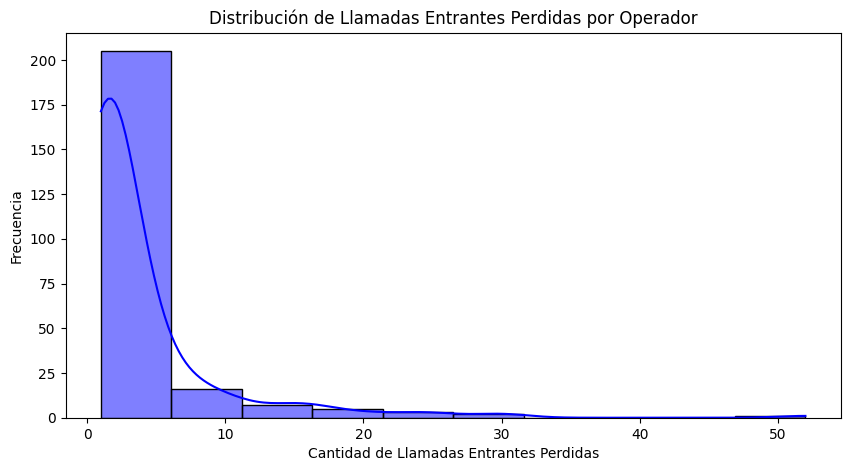

In [20]:
# 1. Cantidad de llamadas entrantes perdidas por operador
lost_calls = telecom[(telecom['direction'] == 'in') & (telecom['is_missed_call'] == True)]
lost_calls_per_operator = lost_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# plt.figure(figsize=(10, 5))
# sns.barplot(x='operator_id', y='calls_count', data=lost_calls_per_operator, palette='coolwarm')
# plt.xticks(rotation=90)
# plt.xlabel("Operador")
# plt.ylabel("Llamadas Entrantes Perdidas")
# plt.title("Llamadas Entrantes Perdidas por Operador")
#plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(lost_calls_per_operator['calls_count'], bins=10, kde=True, color='blue')
plt.xlabel("Cantidad de Llamadas Entrantes Perdidas")
plt.ylabel("Frecuencia")
plt.title("Distribución de Llamadas Entrantes Perdidas por Operador")
plt.show()

De la gráfica podemos observar que mientras menos cantidad de llamadas entrantes perdidas haya (excluyendo el 0), mayor frecuenca de las mismas habrá. A pesar de que haya los operadores puedan tener más de 50 llamadas perdidas, lo "usual" (más no lo ideal) es que se tengan entre 1-5 llamadas perdidas por operador. Esto se debe analizar por la gerencia para disminuir la cantidad de llamadas perdidas por operador.

In [21]:
lost_calls_per_operator.sort_values(by='calls_count', ascending=False, inplace=True)
print(lost_calls_per_operator)

     operator_id  calls_count
98      913942.0           52
196     940588.0           30
210     944226.0           30
6       885890.0           26
206     944216.0           24
..           ...          ...
130     924546.0            1
131     924928.0            1
132     924930.0            1
134     924948.0            1
238     969272.0            1

[239 rows x 2 columns]


Durante este lapso de tiempo, y observando la tabla, se puede ver que varios operadores tuvieron más de 10 llamadas perdidas. Esto se debe analizar debido a que el análisis abarca solamente 3 meses, por lo que es una llamada perdida cada 3er día, que puede no ser tan mal pero ya va a depender de la política o reglas de la empresa.

Ahora bien, de la tabla podemos ver que hubo 3 operadores que tuvieron 30+ llamadas sin atender, incluso uno tuvo un récord de 52 llamadas. Esto puede ser demasiado alarmante y se debería revisar con la empresa.

**Tiempo promedio para llamadas entrantes por operador**

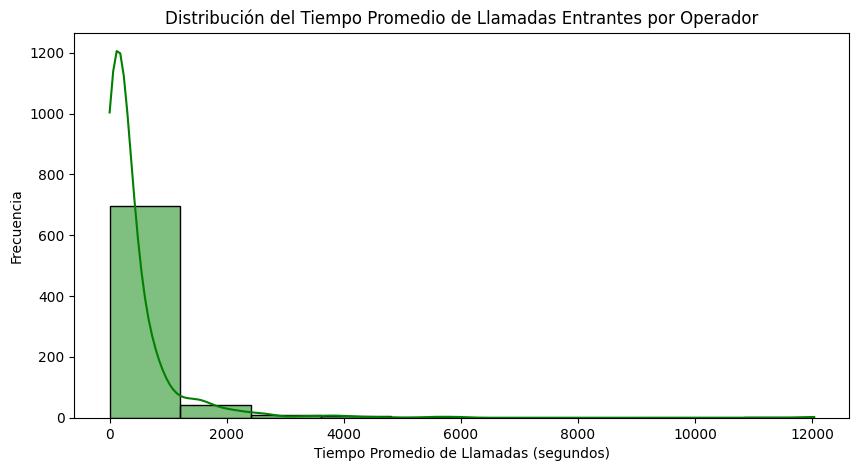

In [22]:
# 2. Tiempo promedio para llamadas entrantes por operador
avg_call_time = telecom[telecom['direction'] == 'in'].groupby('operator_id')['call_duration'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.histplot(avg_call_time['call_duration'], bins=10, kde=True, color='green')
plt.xlabel("Tiempo Promedio de Llamadas (segundos)")
plt.ylabel("Frecuencia")
plt.title("Distribución del Tiempo Promedio de Llamadas Entrantes por Operador")
plt.show()

De la gráfica podemos observar que el tiempo promedio de llamada está en el rango de los 0 - 1000 segundos; es decir, que las llamadas en promedio duran entre 0 y 16 minutos. Aunque existe una posibilidad de que las llamadas duren más de 16 minutos, esta es prácticamente nula pero aún así no debemos rechazar esta idea, las llamadas si pueden durar más de 20 min.

In [23]:
avg_call_time.sort_values(by='call_duration', ascending=False, inplace=True)
print(avg_call_time)

     operator_id  call_duration
674     952948.0   12032.696970
671     952734.0    5908.526316
328     919204.0    5531.117647
288     913938.0    4586.792208
326     919166.0    4145.857143
..           ...            ...
746     970252.0       4.000000
127     900192.0       2.000000
612     944908.0       1.500000
421     929228.0       1.000000
567     940512.0       1.000000

[754 rows x 2 columns]


Durante este lapso de tiempo, y observando la tabla, se puede ver que varios operadores tuvieron llamadas de más de 2,000 segundos, lo que representa llamadas de más de 30 minutos. Esto se debe analizar debido a que la gran mayoría de las llamadas no superan incluso los 10 minutos en cuanto a duración.

Ahora bien, de la tabla podemos ver que hubo 5 operadores que tuvieron llamadas de más de 4,000 minutos de duración, incluso uno tuvo un récord de 12,032 segundos, lo que representan 200 horas. Esto puede ser demasiado alarmante y se debería revisar con la empresa.

**Número de llamadas salientes realizadas por operador**

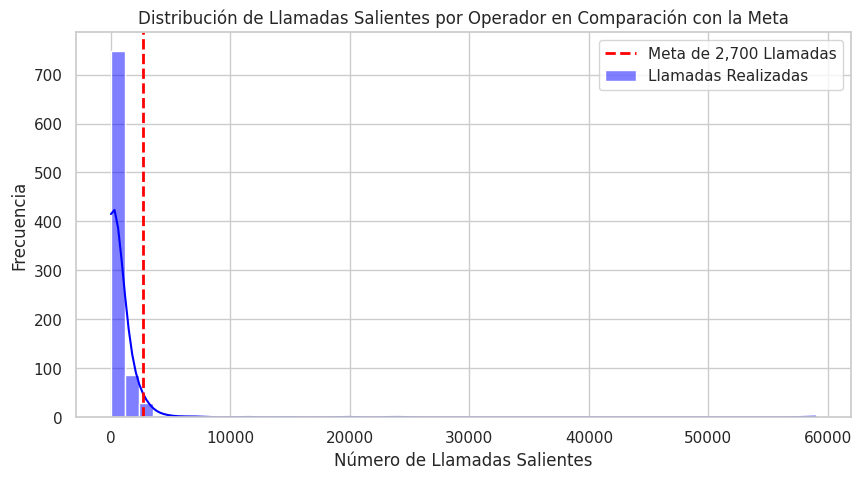

In [31]:
# 3. Número de llamadas salientes realizadas por operador en comparación con su meta
# Suponiendo que cada operador tiene una meta fija de 2,700 llamadas salientes (durante estos 3 meses)
meta_llamadas = 2700
outgoing_calls = telecom[telecom['direction'] == 'out'].groupby('operator_id')['calls_count'].sum().reset_index()
outgoing_calls['Meta'] = meta_llamadas

plt.figure(figsize=(10, 5))
sns.histplot(outgoing_calls['calls_count'], bins=50, kde=True, color='blue', label='Llamadas Realizadas')
plt.axvline(meta_llamadas, color='red', linestyle='dashed', linewidth=2, label='Meta de 2,700 Llamadas')
plt.xlabel("Número de Llamadas Salientes")
plt.ylabel("Frecuencia")
plt.title("Distribución de Llamadas Salientes por Operador en Comparación con la Meta")
plt.legend()
plt.show()

Si suponemos que la meta de un operador es de 30 llamadas por día (métrica a validar con la empresa), que se traduce a 900 llamadas por mes o 2,700 cada tres meses, la mayoría de los operadores no estaría cumpliendo esta meta, mínimo en los 3 meses que se tienen los datos. Este dato es muy alarmante debido a que nos dice que hay una baja productividad de los operadores y se debería modificar o cambiar el modo de operación.

In [25]:
outgoing_calls.sort_values(by='calls_count', ascending=False, inplace=True)
print(outgoing_calls[['operator_id', 'calls_count', 'Meta']])

     operator_id  calls_count  Meta
25      885890.0        58977  2700
24      885876.0        58437  2700
466     929428.0        23754  2700
446     925922.0        19603  2700
255     908640.0        14239  2700
..           ...          ...   ...
553     937770.0            1  2700
554     937772.0            1  2700
556     937778.0            1  2700
200     905480.0            1  2700
775     952968.0            1  2700

[882 rows x 3 columns]


Derivado de la tabla, podemos observar que los operadores no superan en promedio las 5,000 llamadas salientes. Ahora bien, lo más preocupante es que si ponemos una meta de 2,700 llamadas en este lapso de tiempo (que son en promedio 900 por mes o 30 por día), hay operadores que no están llegando a esta meta, lo cuál es muy alarmante y debería revisarse con la empresa. Por otro lado hay operadores que están sobresaliendo en sus metas llegando a tener más de 30 llamadas al día.

**¿Hay diferencias significativas en la eficiencia de los operadores según el plan tarifario de los clientes?**

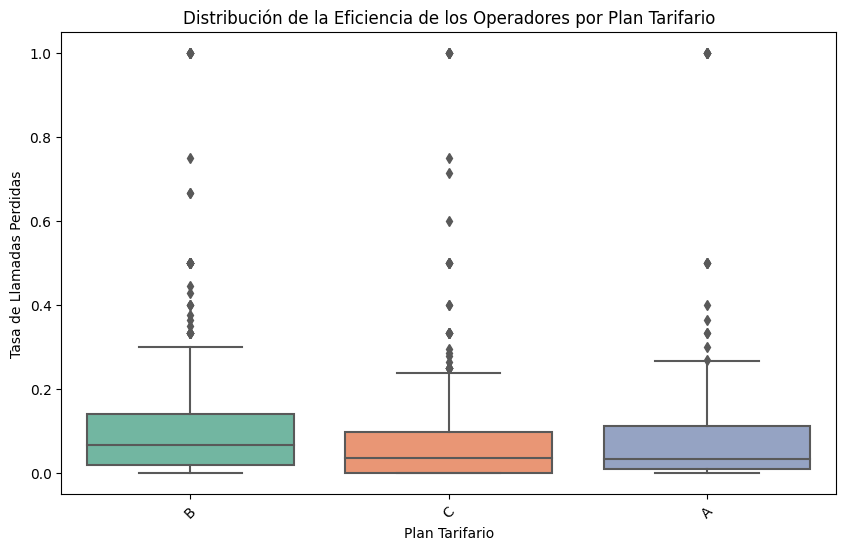

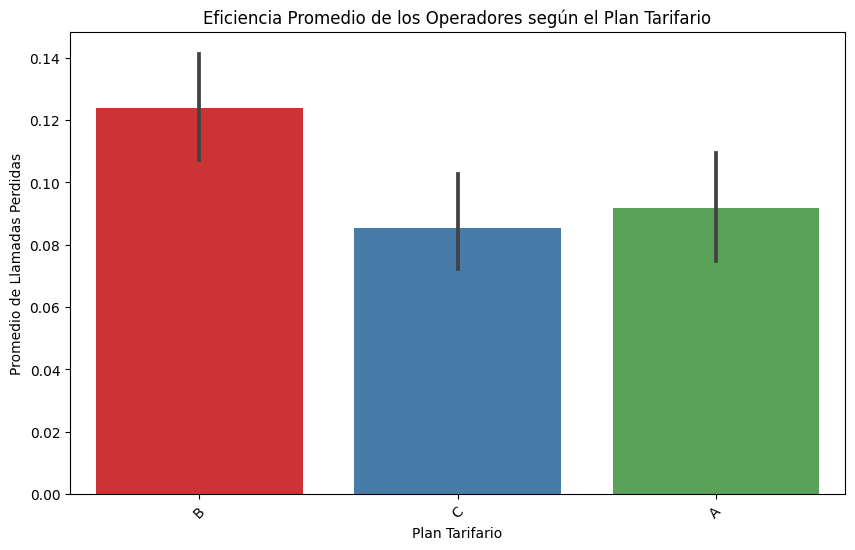

In [26]:
# Calcular la eficiencia por operador y plan tarifario
efficiency_data = telecom.groupby(['operator_id', 'tariff_plan']).agg(
    total_calls=('calls_count', 'sum'),
    missed_calls=('is_missed_call', 'sum')
).reset_index()

# Calcular la tasa de llamadas perdidas por operador y plan tarifario
efficiency_data['missed_call_rate'] = efficiency_data['missed_calls'] / efficiency_data['total_calls']

# Gráfico de cajas para comparar la eficiencia por plan tarifario
plt.figure(figsize=(10, 6))
sns.boxplot(x='tariff_plan', y='missed_call_rate', data=efficiency_data, palette="Set2")
plt.xlabel("Plan Tarifario")
plt.ylabel("Tasa de Llamadas Perdidas")
plt.title("Distribución de la Eficiencia de los Operadores por Plan Tarifario")
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para visualizar el promedio de llamadas perdidas por plan tarifario
plt.figure(figsize=(10, 6))
sns.barplot(x='tariff_plan', y='missed_call_rate', data=efficiency_data, estimator=lambda x: sum(x)/len(x), palette="Set1")
plt.xlabel("Plan Tarifario")
plt.ylabel("Promedio de Llamadas Perdidas")
plt.title("Eficiencia Promedio de los Operadores según el Plan Tarifario")
plt.xticks(rotation=45)
plt.show()

De las gráficas de arriba, podemos ver que aunque el promedio de llamadas perdidas es bajo, si hay diferencia entre los 3 planes de tarifa del servicio. Se puede concluir que el plan tarifario "C" es el que menos % de llamadas perdidas tiene con aproximadamente 8% de sus llamadas, mientras que el plan tarifario "B" es el que más % de llamadas perdidas tiene con aproximadamente 12% de sus llamadas. A pesar de que ambos porcentajes son similares entre sí, si hay una gran diferencia entre planes tarifarios. Aquí será cuestión de investigar que es cada plan tarifario e identificar porque se tienen mayor % de llamadas perdidas en cierto plan que en otro.

**¿Qué operadores tienen el mayor tiempo total de conversación versus llamadas gestionadas?**

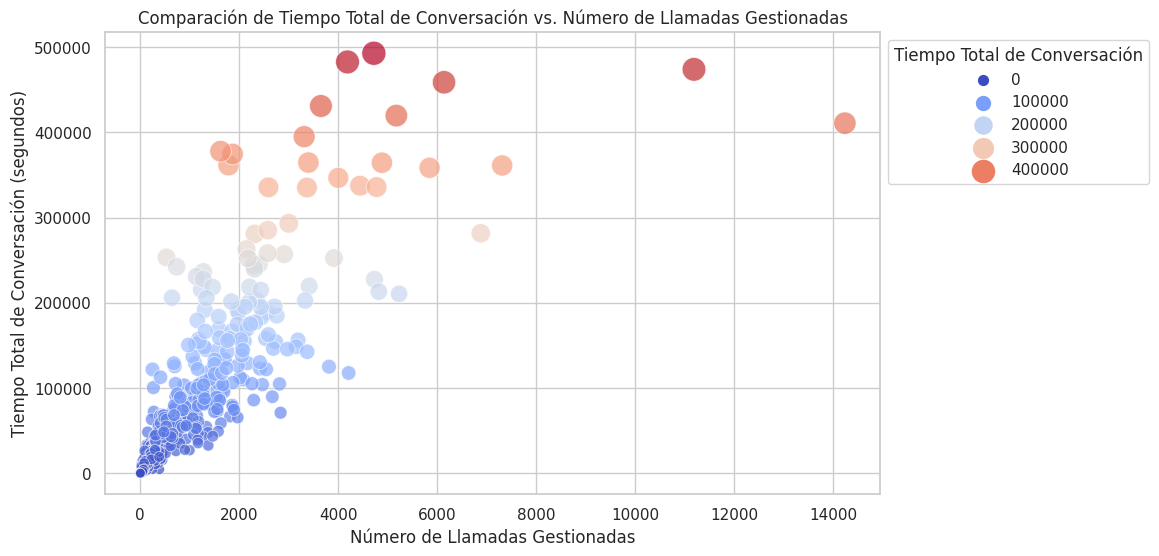

In [27]:
# Agrupar datos por operador para calcular el total de duración y el total de llamadas gestionadas
operator_stats = telecom.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    total_talk_time=('total_call_duration', 'sum')
).reset_index()

# Filtrar operadores con 15,000 llamadas o menos
filtered_operators = operator_stats[operator_stats['total_calls'] <= 15000]

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered_operators['total_calls'], 
    y=filtered_operators['total_talk_time'], 
    hue=filtered_operators['total_talk_time'], 
    palette="coolwarm", 
    size=filtered_operators['total_talk_time'],
    sizes=(50, 300),
    alpha=0.7
)

# Etiquetas y título
plt.xlabel("Número de Llamadas Gestionadas")
plt.ylabel("Tiempo Total de Conversación (segundos)")
plt.title("Comparación de Tiempo Total de Conversación vs. Número de Llamadas Gestionadas")
plt.legend(title="Tiempo Total de Conversación", loc='upper left', bbox_to_anchor=(1,1))
plt.show()

De la gráfica nuestro foco de atención será los operadores que tengan una cantidad mayor en cuanto a tiempo total de llamada pero que tengan un menor número de llamadas; es decir, nuestro foco serán los operadores que estén entre 300,000 y 500,000 segundos de tiempo total y entre 2,000 y 6,000 llamadas gestionadas. De este foco de atención podemos ver que estos operadores están teniendo la mayor cantidad de tiempo total en llamadas pero con una cantidad mínima de llamadas, lo que se traduce a llamadas de mayor tiempo, a comparación de otros operadores que tienen la misma cantidad de llamadas pero menor tiempo total invertido.

In [28]:
# Filtramos los operadores críticos de la gráfica de arriba
filtered_subset = filtered_operators[
    (filtered_operators['total_calls'].between(2000, 6000)) & 
    (filtered_operators['total_talk_time'].between(300000, 500000))
]

# Mostrar los primeros registros filtrados
print(filtered_subset)

     operator_id  total_calls  total_talk_time
12      882686.0         3650           431100
78      891410.0         3397           364722
108     893804.0         5846           358580
203     901880.0         4187           482797
204     901884.0         2590           335615
368     913938.0         5174           419807
497     921318.0         4883           364518
613     931458.0         4441           337548
843     945278.0         4001           346782
850     945294.0         3368           335401
856     945310.0         3311           395112
862     945322.0         4775           335922
958     952948.0         4720           493000


Esta tabla muestra a los 13 operadores que están críticos en cuanto a cantidad de llamadas con respecto al número total de segundos invertidos en dichas llamadas. Una recomendación para la gerencia es revisar estos casos y ver que está pasando con los operadores y sus llamadas (desempeño)

## Pruebas de Hipótesis

**Hipótesis 1:  Los operadores con tiempos de espera más largos tienden a perder más llamadas.**

Hipótesis nula (H₀): No hay relación entre el tiempo de espera y el número de llamadas perdidas.

Hipótesis alternativa (H₁): Existe una correlación positiva entre el tiempo de espera y el número de llamadas perdidas.

In [30]:
# Filtrar solo llamadas entrantes
incoming_calls = telecom[telecom['direction'] == 'in'].copy()  # Usamos .copy() para evitar problemas con la referencia

# Calcular el porcentaje de llamadas perdidas por operador
incoming_calls.loc[:, 'lost_calls'] = incoming_calls['is_missed_call'] * incoming_calls['calls_count']
lost_calls_per_operator = incoming_calls.groupby('operator_id').agg(
    total_calls=('calls_count', 'sum'),
    total_lost_calls=('lost_calls', 'sum'),
    total_duration=('total_call_duration', 'sum')
).reset_index()

# Calcular el porcentaje de llamadas perdidas por operador
lost_calls_per_operator['lost_calls_percentage'] = (lost_calls_per_operator['total_lost_calls'] / lost_calls_per_operator['total_calls']) * 100

# Realizar la prueba de correlación de Pearson entre el tiempo total de llamada y el porcentaje de llamadas perdidas
from scipy.stats import pearsonr

correlation, p_value = pearsonr(lost_calls_per_operator['total_duration'], lost_calls_per_operator['lost_calls_percentage'])

# Mostrar los resultados
print(f"Coeficiente de correlación de Pearson: {correlation}")
print(f"Valor p: {p_value}")

# Tomar la decisión
alpha = 0.05  # Nivel de significancia del 5%
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una correlación significativa entre el tiempo de espera y el porcentaje de llamadas perdidas.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los operadores con tiempos de espera más largos tienden a perder más llamadas.")

Coeficiente de correlación de Pearson: -0.04527690553448044
Valor p: 0.2142972641554242
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los operadores con tiempos de espera más largos tienden a perder más llamadas.


## Plan de Acción

1️⃣ **Proponer intervenciones basadas en los hallazgos**

**Objetivo:** Mejorar el rendimiento de los operadores y reducir la tasa de llamadas perdidas.

✅ **Acciones a Implementar**

Basarse en los resultados obtenidos para proponer soluciones o intervenciones que mejoren el desempeño de los operadores.

- Si se confirma que ciertos operadores tienen tiempos de espera excesivos, implementar medidas para optimizar la gestión de tiempos de espera (por ejemplo, contratar más operadores en horas pico o automatizar ciertas consultas).
- Si el análisis de ineficiencia se basa en variables adicionales, diseñar programas de capacitación o ajustes operacionales para mejorar la eficiencia de esos operadores.
- Considerar la personalización de las tarifas y servicios de atención al cliente en función del operador y sus áreas de debilidad identificadas.

----------------------------------------------------------------------------------------------

2️⃣ **Monitoreo y seguimiento**

**Objetivo:** Evaluar el impacto de las acciones tomadas y seguir mejorando continuamente el rendimiento de los operadores..

✅ **Acciones a Implementar**

Implementar un sistema de monitoreo continuo para evaluar la efectividad de las intervenciones y la mejora del desempeño.

- Establecer métricas clave de desempeño (KPIs) que permitan hacer un seguimiento del éxito de las acciones.
- Revisar periódicamente los resultados de llamadas perdidas, tiempos de espera, y satisfacción del cliente.
- Ajustar las intervenciones en función de los datos obtenidos para optimizar la eficiencia de los operadores a lo largo del tiempo.

## Métricas de seguimiento

**Porcentaje de Llamadas Perdidas**
- Indicador: Proporción de llamadas entrantes que no fueron atendidas (llamadas perdidas).
- Frecuencia de Medición: Mensual o semanal.

**Promedio de Tiempo de Espera**
- Indicador: Verificar si el crecimiento mensual sigue acelerándose después de las campañas y ajustes.
- Frecuencia de Medición: Mensual o semanal.

**Número de Llamadas Atendidas por Operador**
- Indicador: Cantidad de llamadas gestionadas por un operador en un periodo específico.
- Frecuencia de Medición: Mensual o semanal.

**Tasa de Resolución de Llamadas**
- Indicador: Porcentaje de llamadas resueltas en el primer contacto sin necesidad de seguimiento adicional.
- Frecuencia de Medición: Mensual.

**Net Promoter Score (NPS)**
- Indicador: Grado de lealtad de los clientes, basado en su disposición a recomendar el servicio.
- Frecuencia de Medición: Trimestral o semestral.

## Conclusiones y Recomendaciones

**Conclusiones:**

- **Desempeño de los Operadores:** A pesar de que no se ha encontrado evidencia suficiente para afirmar que los operadores ineficaces tengan un porcentaje de llamadas perdidas mayor que el promedio, las métricas siguen siendo indicadores clave de la eficiencia operativa. Estos deben ser monitoreados constantemente para identificar áreas de mejora.

- **Impacto del Tiempo de Espera y la Gestión de Llamadas:** El monitoreo constante de tiempos de espera junto con la tasa de abandono y el porcentaje de llamadas atendidas sin transferencias es crucial para mantener la satisfacción del cliente.

**Recomendaciones:**

- **Optimización de procesos de atención:** Capacitar a los operadores para mejorar tiempos de respuesta y resolución en el primer contacto, y utilizar tecnologías de automatización para reducir la carga de trabajo repetitiva.

- **Reducción de tiempos de espera:** Implementar estrategias para redistribuir flujos de llamadas según la complejidad, y considerar el uso de IA o bots para manejar consultas simples y liberar a los operadores.

- **Monitoreo y ajustes periódicos:** Establecer metas claras de desempeño para indicadores clave (como tasa de abandono y llamadas perdidas) y realizar evaluaciones mensuales para identificar áreas de mejora rápidamente.




 

 
